<a href="https://colab.research.google.com/github/AngelD40804/Machine-Learning-Fundamentals/blob/LAB7/LAb07_Angel_Duarte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dropout

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train.shape

(60000,)

In [ ]:
labels = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}

In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  #compared to last exercise, mlabels of y are not encoded
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

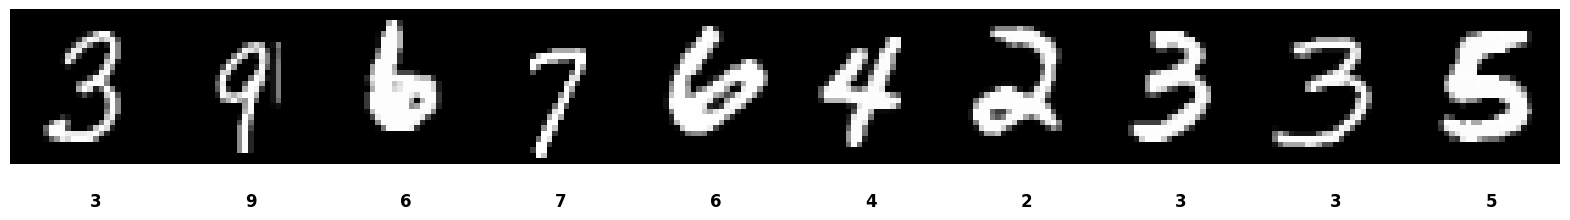

In [ ]:
display_random_images(X_train, y_train)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_exp = np.expand_dims(X_train, -1)
X_test_exp = np.expand_dims(X_test, -1)
X_test_exp.shape


(10000, 28, 28, 1)

In [ ]:
X_train_scaled = X_train_exp.astype('float32') / 255.0
X_test_scaled = X_test_exp.astype('float32') / 255.0

# y_train_encoded = to_categorical(y_train, num_classes=10)
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(64, (7, 7), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage:
input_shape = (28, 28, 1)  # Example input shape, adjust according to your data
num_classes = 10  # Example number of classes, adjust according to your task

model = create_cnn_model(input_shape, num_classes)
optimizer = SGD(learning_rate = 0.1)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 10)                77450     
                                                                 
Total params: 80650 (315.04 KB)
Trainable params: 80650 (315.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_train_encoded.shape

(60000, 10)

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=60, batch_size=128, validation_split = 0.2)


Epoch 1/60


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(1280,) and logits.shape=(128, 10)


Examine the dataset. Answer for yourself the following questions:

1. What kind of data occurs in our dataset?
  - Pictures from 0 - 9
2. How many data samples do we have in train and test datasets?
  - For train, 6000, for test, 1000 data samples, shape 28x28
3. How many colour channels does the input variable have?
  - 1, for grays
4. What is the size of the input images?
  - shape 28x28
5. What is the necessary preprocessing of the input data X?
  - adding an extra layer including the colour channel
6. How many classes do we have in target variable?
  -
7. What is the necessary preprocessing of target variable y?